In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
#import tensorflow as tf
config = tf.ConfigProto(allow_soft_placement=True)
#最多占gpu资源的70%
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)
#开始不会给tensorflow全部gpu资源 而是按需增加
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)


In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [15]:
# Training Data
train_X = numpy.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
train_X

array([  3.3  ,   4.4  ,   5.5  ,   6.71 ,   6.93 ,   4.168,   9.779,
         6.182,   7.59 ,   2.167,   7.042,  10.791,   5.313,   7.997,
         5.654,   9.27 ,   3.1  ])

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.117017150 W= 0.361555 b= -0.00397468
Epoch: 0100 cost= 0.112388276 W= 0.354896 b= 0.0439287
Epoch: 0150 cost= 0.108294189 W= 0.348633 b= 0.0889831
Epoch: 0200 cost= 0.104673125 W= 0.342743 b= 0.131358
Epoch: 0250 cost= 0.101470470 W= 0.337203 b= 0.171212
Epoch: 0300 cost= 0.098637909 W= 0.331992 b= 0.208696
Epoch: 0350 cost= 0.096132688 W= 0.327092 b= 0.243951
Epoch: 0400 cost= 0.093917005 W= 0.322482 b= 0.277109
Epoch: 0450 cost= 0.091957390 W= 0.318147 b= 0.308296
Epoch: 0500 cost= 0.090224378 W= 0.31407 b= 0.337626
Epoch: 0550 cost= 0.088691674 W= 0.310235 b= 0.365213
Epoch: 0600 cost= 0.087336175 W= 0.306629 b= 0.391159
Epoch: 0650 cost= 0.086137429 W= 0.303237 b= 0.415562
Epoch: 0700 cost= 0.085077330 W= 0.300046 b= 0.438514
Epoch: 0750 cost= 0.084139824 W= 0.297046 b= 0.4601
Epoch: 0800 cost= 0.083310768 W= 0.294223 b= 0.480403
Epoch: 0850 cost= 0.082577653 W= 0.291569 b= 0.499498
Epoch: 0900 cost= 0.081929356 W= 0.289073 b= 0.517457
Epoch: 0950 cost= 0.081356

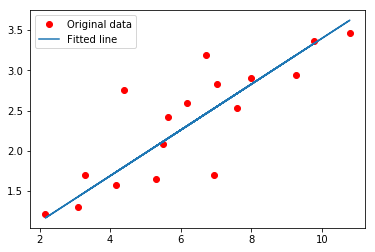

In [12]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [ ]:
# Regression result